In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
import itertools
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('data/train.csv')
df_array = np.asarray(df)
emg = df_array[:, :-1]
print(emg.shape)
joint_angle = df_array[:, -1]
print(joint_angle.shape)
y = joint_angle
x = emg

(5348, 15)
(5348,)


In [22]:
print(y.shape, 'and', x.shape)

(5348,) and (5348, 15)


### Part of Gaussian Process Regression

In [23]:
# Define kernel parameters. 
l = 0.1
sigma_f = 2
sigma_n = 0.4

# Define kernel object. 
kernel = ConstantKernel(constant_value=sigma_f,constant_value_bounds=(1e-3, 1e3)) \
            * RBF(length_scale=l, length_scale_bounds=(1e-3, 1e3))

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor
# Define GaussianProcessRegressor object. 
gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)

# X = x.reshape(n, d)
# X_star = x_star.reshape(n_star, d)
# Fit to data using Maximum Likelihood Estimation of the parameters.
gp.fit(x, y)


KeyboardInterrupt: 

In [54]:
# Make the prediction on test set.
y_pred = gp.predict(x_test)

In [55]:
y_test.shape

(5320, 1)

In [56]:
t = np.linspace(start = 0, stop = 5320, num = 5320)
t = np.asarray([t]).T
t.shape

(5320, 1)

In [58]:
from numpy import savetxt
savetxt('pred.csv', y_pred, delimiter=',')

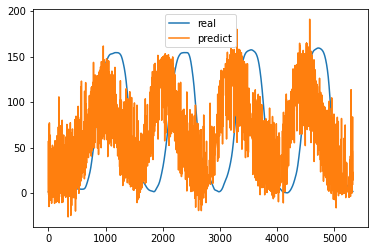

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(t, y_test, label = "real")
plt.plot(t, y_pred, label = "predict")
plt.legend()
plt.show()

In [39]:
y_pred.shape

(5320, 1)

In [40]:
y_pred

array([[ 1.08762845e+00],
       [ 1.03173428e-01],
       [-5.99687813e-01],
       ...,
       [ 2.06269386e-06],
       [ 1.27800937e+00],
       [ 2.43916467e+00]])